##

### Control bootcamp overview
Contents:
    Highlights of modern control theory
    design controllers
    design sensors (Kalman filters)
    major types of optimal control theory
    what is easy and hard in control theory
    
Dynamical systems analysis has been a great way at describing/predicting the evolution of the system. Optimal control builds on dynamical system analysis by allowing for interventions. 

*Dyanmical systems*: 
$\dot{x} = Ax$

*Control systems*: 
$\dot{x} = Ax + Bu$

#### Types of control: 
Passive control - designed into system upfront/doesn't consume energy
Active control - consumes energy
    Open loop - preplanned control law, always putting in energy through input signal $u_t$
    Closed loop - generally, lower energy than open loop, input signal takes feedback from output signal
    
*Why feedback (closed loop) over open loop control?*
*Uncertainty:* Endogenous system uncertainty in physics model. Allows to deal with uncertainty, an enemy of open loop control. If system deviates from model of system, control laws can adapt. 
*Instability:* feedback can overcome in instabilities (changes eigenvalues of system), i.e. create new stable points.
*Disturbances:* exogenous uncertainties i.e. guest of wind.
    
    


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

# state space, ODE and discertisation functionality
from scipy import signal

### Nomenclature
$u_t$ - Input signal
$B$ - input actuation matrix

$\dot{x} = Ax$ - A continous-time linear dynamical system

$X_{t+1} = A^{t} X_0$- A discrete-time linear dynamical system

Rank deficient - not full column rank

Controllability Gramian - magnitude of controllability a system has. Usually calculated by an SVD approach to on 'rank deficiency' calculation matrix. 

*Stability* - A system is said to be *stabilisable* if all of the unstable eigenvectors of A are in controllable subspace. I.e. you may not be able to control all of $\mathbb{R^n}$ however if all uncontrollable directions have negative eigenvalues (are therefore stable) then system is *stabilisable*.

*Reachability* - refers to whether a state can be reached given *controllability*. 

*Observability* - given system $\dot{x} = Ax + Bu$, observability is the part of state X that is observable (can obtain data for) such that $y = Cx$. 

*Estimator* - an estimator is used to estimate the full state x. An example is the Kalman filter.

### Linear systems (video 2)

https://www.youtube.com/watch?v=nyqJJdhReiA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=2

How to analyse and solve linear system
HOw to linearise a system and find fixed points
What do eigenvalues mean for system

The crux of this video is about reducing the complexity of the dynamical system $\dot{x} = Ax$, through transforming to a *more simple* (linearly independent) eigenvector coordinate system.
For what types of systems can we control for; include tests
1. Start with linear system; need to solve for $dot{x} = Ax$ but involves exponential of matrix. 
2. Transfrom into eigenvector coordinates of A. 
2. Solve differential equations in eigenvector coordinates.
3. Taylor series of $e^{At} = T e^{Dt} T^{-1}$, proof below.\
4. Plug eigenvector solution back into *real physical* coordinates, x, $X(t) = Te^{Dt}T^{-1}X(0)$


Cornerstone of lecture for controls. 
$$\dot{x} = Ax$$
Which has solution: 
$$x(t) = e^At x(0)$$

But when A is a matrix how do we take the exponential? Answer; the Taylor series.

$e^{At} = I + At + \frac{A^2t^3}{2!} + \frac{A^3t^3}{3!} +  ....$

The above can be decomposed into eigenvalues and eigenvector coordiante system where $AT = TD \rightarrow T^-1 A T = D$. Changing these coordinates makes the system easier to solve. Consider mapping to z coordinates where $$x = Tz$$ and $$\dot{x} = T\dot{z} = Ax = A Tz  \rightarrow \dot{z} = T^{-1} ATz = Dz$$. Where Z is in eigencoordinates (but why?) and D is the diagonal matrice of the eigenvalues which yields $$ \dot{z} = Dz$$ The above system $ \dot{z} = Dz$ is simple and known $z(t) = e^Dt z(0)$$




### Staibility and eigenvalues (video 3) 
https://www.youtube.com/watch?v=1YMTkELi3tE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=4

Stability is about analying what happens to the system do as time goes to infinity. The crux is anlaysing the eigenvalue matrix, D; if any of these eigenvalues are positive the system 'blows up' and diverges off to infinity. **The system is said to be unstable.** A big part of control theory is that deriving appropriate $u$ control actions to drive eigenvalues to be negative/stable. 

Generally in physiscs, the linear dynamical system is continuosly evolved. However in practice the system is measured in discrete time. A discrete time system can be modelled as $X_{k+1} = A x_k , x_k = x(\Delta t)$. In discete time the notion of *stability* is slightly different. In discerte time, state at time t can be derived by simply evolving the system's matrix A, such that: 
$$ X_1 = A^1 X_0 $$
$$ X_2 = A^2 X_0 $$

$$ X_N = A^N X_0 $$



### Lienarizing Around a Fixed Point (video 4)
https://www.youtube.com/watch?v=1YMTkELi3tE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=4

Previous videos have dely with the linear dynamical systems in continuous time. For a non-linear applicatinon, instead of $ \dot{x} = Ax$, the non-linear form is $\dot{x} = f(x)$ where $f(x)$ is non-linear but assumed to have fixed points.
Fixed point is where the system is stablae and doesn't move i.e. the vertical top or bottom of a pendulum. Albeit, this fixed point is an unstable fixed point as any deviation from this position will cause the system to move away from fixed point.

1. Find fixed points such that $f(\bar{x}) = 0$
2. Linearise around x using Jacobian (by taking the partial derivatives of f) 

i.e. for dynamical system: 
$$ \dot{x_1} = f_1(x_1, x_2) = x_1 x_2$$
$$ \dot{x_2} = f_2(x_1, x_2) = x^2_1 + x^2_2$$

then:
$$ \frac{Df}{Dx} = \begin{bmatrix} x_2 & x_1 \\ 2x_1 & 2x_2 \end{bmatrix}$$ 


Around a fixed point for $\dot{x} = f(x)$, on a local neighbourhood, expand $f(\bar{x})$ using a Taylor series. Results in, $ \dot{x}  = f(\bar{x}) + \frac{Df}{Dx}_{\bar{x}}((x-\bar{x}) + \frac{D^2f}{Dx^2}_{\bar{x}}(x-\bar{x})^2  $. However, any term above the first order is assumed to be zero. The left over dynamics result in the linearisation of x which yields $\Delta \dot{x} = \frac{Df}{Dx}_{\bar{x}} \Delta X \rightarrow \Delta \dot{x} = A \Delta x$



#### Pendulum example
Is a ture nonlinear system which has two fixed points and following equations. 

1. Find state space 
$\ddot{\theta} = -\frac{g}{L}sin(\theta)$ which has the following state space equation **Inert image**

Then find the fixed points of the state space solution

2. Find Jacobian
Find matrix of partial differential equations of the system. Substitute in fixed points to Jacobian. 


### Controlability (video 5)
Until this point focus has been on $\dot{x} = Ax$ absent of $Bu$. A's eigenvalue's were studied to identify which dynamical systems were stable and which weren't. Now control feedback is added to the system, called *controlability*. 
Starting with $\dot{x} = Ax - BKx$, where K is the proportionality of feedback control K.

What determines if a system is controlable? 

In industry control problesms the A (dynammical system is fixed) and B (control dynamics)matrices are fixed; only $u$ is controlable.

Note: for some complex systems, small number of coupled actuators can control the system. How can we determine if a system can be controled? 

IFF rank(C) = n then system is controllable, given C = \[B, AB, A^2B, A^3B, ... , A^{n-1}B\] (note: A and B are from the control system equation  $\dot{x} = Ax - BKx$ and n is the dimension of the X. 
This rule is a binary outcome to determine whether a system is controllable or not. To quantify the amount of controllability of the system, the Singular Value Decomposition of C is taken. The order of the Singular Values is the order in which it the system is easiest to control. 


### Controlability Reachability, Eigenvalue Placement (video 6)
Reintroduces the *rank deficiency* condition about matrix C, = \[B, AB, A^2B, A^3B, ... , A^{n-1}B\] where rank(C) = n where $X \in \mathbb{R^n}$

Lecture introduces 3 equivalences; 
1. System is controlable
2. Arbitrary eigenvalue (pole) placement where $u = -kX \rightarrow \dot{x} = (A -Bk)X$ 
3. Reachability (full in $\mathbb{R^n}$  - Reachable set $R_t = { \eta \in \mathbb{R^n} | there is an input u(t) so that x(t) = \eta}$. More precisely, $R_t \in \mathbb{R^n}$

## Controlability and Discrete-Time Impulse Response (video 7)
https://www.youtube.com/watch?v=tnsWsMwYbEU&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=7

Why is the rank deficiency of C sufficient for determining controllability of a system? To give an intuition as to sufficiency consider an *impulse response  in u* at time = 0 for discrete dynamical system $x_{k+1} = Ax_k + Bu_k$ with X(0) = 0 and impulse response u(0) = 1 and u(t) = 0 for t > 0. The below matrix shows how an impulse is propagated through the state space of a solution. The C matrix are these column vectors stacked as columns. The idea being if this stacked matrix is not full rank then variables exist in state stapce, X, such that the control impulse u cannot influence them.

$$\begin{matrix} 
u_0 = 1 & X_0 = 0 \\
u_1 = 0 & X_1 = B \\
u_2 = 0 & X_2 = AB \\
u_3 = 0 & X_3 = A^2B \\
... & ... \\
u_n = 0 & X_n = A^{n-1}B \\
\end{matrix}
$$


## Degrees of Controllability and Gramians (video 8)
https://www.youtube.com/watch?v=ZNHx62HbKNA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=8

Previously had a binary rule for whether a systme is controllable. Each system has a degree of which it can be controlled; referred to as the *Controllability Gramian*. Eigenvectors of the Gramian matrix have the most amount of controllability, i.e. given a input signal of fixed magnitude, the directions with the largest eigenvalues are affected most. i.e. the Eienvectors/values of Gramian is how far you can get in controllability of a unit input of control. 

A system dynamical system *with control* yields $X(t) = e^{At} X(0) + \int_0^te^{A(t - \tau) B u(\tau) d \tau$ where the Gramian (controllability) is given as  $W_t =  \int_0^te^{At}BB^Te^{A^tt}d \tau \in \mathbb{R^{nxn}}$. IN subsequenet lectures the *Gramian matrix* will be derived; however, Gramian can also be thought of as the *controllability matrix* squared. Taking the SVD of C, SVD(C) ranks the magnitudes of direction of each eigenvector. 

A system is said to be *stabilisable* if all of the unstable eigenvectors of A are in controllable subspace. I.e. you may not be able to control all of $\mathbb{R^n}$ however if all uncontrollable directions have negative eigenvalues (are therefore stable) then system is *stabilisable*.


## Controllabilty and the PBH Test (video 9): 
https://www.youtube.com/watch?v=PrfxmkBsYKE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=9
The Popov-Belevitch-Hautus (PBH) test is another test for controllability which is favourable compared to previous rank deficiency tests of C as requires less compute. PBH test assesses if (A, B) is controllable be computing: 
$$ rank([(A - \lambda I) B]) = n \quad \forall  \lambda \in \mathbb{C}$$

There are three criteria to determine $ rank([(A - \lambda I) B]) = n$ 
1. When $\lambda$ is not the eigenvalues then rank (A - \lambda I) = n since determinant $\ne$ 0
2. B needs to have some component in each eigenvector direction. 
3. If B is a random vector, then (A,B) will be cotnrollable with high probability. 

Note: when $rank([(A - \lambda I) B]) = n$ has m repeated eigenvalues then B must be m dimensions. 

## Cayley-Hamilton Theorem (video 10): 
https://www.youtube.com/watch?v=PrfxmkBsYKE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=10
Every matrix A satisfies its own characteristic (eigenvalue) equation. This is important for equivalence for *controlability* and *reachability* which is built on the *Cayley-Hamilton* theorem which states:
$$det(A-\lambda I) = 0 $$
$$ \lambda ^n + a_{n-1} \lambda ^{n-1} + ... + a_2 \lambda ^2 + a_1 \lambda  + a_0 = 0$$
and since A satisfies its own characteristic equation, then: 
$$ A ^n + a_{n-1} A ^{n-1} + ... + a_2 A ^2 + a_1 A  + a_0 = 0 $$
$$ A ^n  = a_{n-1} A ^{n-1} + ... + a_2 A ^2 + a_1 A  + a_0 = 0 $$

This means $e^{At} = \phi_0(t)I + \phi_1(t)A + ... + \phi_n(t)A^{n-1}$.

## Controlabiliy and Reachable with Cayley-Hamilton (video 11)
Goal: show that with *controlability*, any state is *reachable*. Note if state, $\xi \in \mathbb{^n}$, is reachable, then $\xi = \int^t_0 e^{A(t-\tau)}Bu(\tau)d\tau$ for some $u(\t)$. Then using the Cayley-Hamilton theorem, the complicated convolution can be avoided to put into form: 
$$\xi = \int^t_0 (\phi_0(t-\tau)u(\tau)IB + \phi_1(t-\tau)u(t)AB + ... + \phi_n-1(t-\tau)u(t)A^{n-1}B)d\tau$$
$$\xi = B \int^t_0 (\phi_0(t-\tau)u(\tau)d\tau + AB\int^t_0 \phi_1(t-\tau)u(t)d\tau + ... + A^{n-1}B\int^t_0\phi_n-1(t-\tau)u(t))d\tau$$

$$
\xi =
\begin{bmatrix} 
B & AB & ... & A^{n-1}B
\end{bmatrix}
\begin{bmatrix} 
\int^t_0 (\phi_0(t-\tau)u(\tau)d\tau \\
\int^t_0 \phi_1(t-\tau)u(t)d\tau \\
... \\
\int^t_0\phi_n-1(t-\tau)u(t))d\tau
\end{bmatrix}
$$

From the *linearisation* of the system by application of Cayley-Hamilton theorem it can be shown that the transformation spans $\mathbb{R^n}$. Note: there is no unique u(t) that will yield a given state, as there are infinite number of ways to reach given state $\xi$

## Inverted pendulum on a cart (video 12)
Dynamical system is non-linear and has following characteristics:
$$ \bar{x} = \begin{bmatrix} x \\ \dot{x} \\ \theta \\ \dot{\theta} \end{bmatrix}$$

The system has two fixed points; $(free, 0, 0, 0) or (free, 0,\pi, 0)$ for downward and upward fixed points respectively. Each point is then linearised.

*Desigining a controller*. Code is presented which covers; 
1. Compute eigenvalues of A to identify stable points.
2. Determine rank of matrix to determine *controlability*. 
3. Set values of prortional controller K such that eigenvalues of $(A-B*K)$ are stable and equal to eigenvalue vector defined (i.e. all negative). Note there is sweet spot, such that the eigenvalues reach a solution fast but not so fast that the control breaks. This optimal trade off is solved through application of Linear Quadratic Regulators which balance how fast you get to a stable state vs the control energy it takes to get there.

### Linear Quadratic Regulator Control for the Inverted Pendulum on a Cart (video 13)
Previously, eigenvalues for the (A-BK) matrix used for feedback was guessed. However, given a certain cost function, an optimal set of eigenvalues exists. Linear Quadratic Regulation is a method to calculate this optima. Given, the objective function: 
$$ J = \int_0^\infty (x^TQx + u^TRu)dt$$

LQR refers to:
- Linear - linear in feedback of K 
- Quadratic - quadratic in cost function
- Regulator - means will stabilise system

### Motivation for Full-State Estimation (video 15)
https://www.youtube.com/watch?v=LTNMf8X21cY&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=15<br>
With LQR full control of the system was available, however, in real life full state isn't alway accessible. Given a dynamical system, $\dot{x} = Ax + Bu, \quad x \in \mathbb{R^n}$, the observability of a system is given by $y = Cx, \quad y \in \mathbb{R^p}$ sucht that p << n. Whereas *controlability* is steering towards state, *observability* is can I *observe* state X from measurement $y(t)$. Since for control, not all states are always available and an *observer* can be created.

### Observability (video 16)
https://www.youtube.com/watch?v=LTNMf8X21cY&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=16 <br>
An estimator is used to estimate the full state x. An example is the Kalman filter. Observability and controlability have the same linear algebra i.e. the same rank tests apply. Mathematically, they are the same problem Gramians apply etc.

### Full State Estimation (video 17)
https://www.youtube.com/watch?v=MZJMi-6_4UU&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=17 <br>

Observability, has the same linear algebra as controlabiity. Controlabiliyt meant can I steer a system anywhere given some u, whereas observability means can I estimate any state x from measurements of y(t). 
The Kalman filter is a method to derive full state estimations, required for input into Linear Quadratic Controllers. Starting with the dynamical system: 
$$ \dot{x} = Ax + Bu $$
$$ y = Cx$$ 
Then the estimator for the full states, the *Kalman filter*, is a dynamical system in itself such that $\hat{x} = f(u,y)$. Then the estimate $\frac{d}{dt}\hat{x} = A \hat{x} + Bu + K_f(y - \hat{y})$ given that $\hat{y} = C\hat{x}$. Rearranging $\frac{d}{dt}\hat{x}$ yields: 
$$
\begin{align}
\frac{d}{dt}\hat{x} &= A\hat{x} + Bu + K_fy - K_fC\hat{x} \\
&= (A - K_fC)\hat{x} + \begin{bmatrix} B & K_f \end{bmatrix}\begin{bmatrix} u \\ y \end{bmatrix}
\end{align}
$$ 
The addition of the $K_f(y-\hat{y})$ term is to account for the difference between how the system was predicted to act vs how it actually did act and corrects the estimate. 

Finally, the full state estimate error, $epsilon = x - \hat{x}$ that has the following dynamical system for error. 
$$
\begin{align}
\frac{d}{dt}\epsilon &= \frac{d}{dt}x - \frac{d}{dt}\hat{x} = Ax + Bu - A\hat{x} + K_fC\hat{x} - K_fy  - Bu \\
&= A(x-\hat{x}) - K_fC(x - \hat{x}) \quad \text{since 'Bu's cancel out} \\
&= (A - K_fC)\epsilon \\ 
\end{align}
$$

Note: the eigenvalues of $(A -K_fC)$ are changed by the filter gains to reach observability.

In the last equation, if observable than place eigenvalues by choosing optimal K.
![](video_17.PNG)

### Kalman Filters (video 18)
https://www.youtube.com/watch?v=LTNMf8X21cY&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=17 <br>

Kalman filter has components: 
- $W_d$ - Gaussian (system disturbance) with zero mean and defined variance, $V_d$.
- $V_d$ - Variance
- $W_n$ - Gaussian (measurement noise) with zero mean and defined variance, $V_n$.
- $V_n$ - Variance

such that: 
$$ \dot{x} = Ax + Bu + w_d$$
$$ y = Cx + w_n$$ 

The Kalman filter balances $\dot{x} = (A-k_fC)\epsilon$ and optimises $J = E((x - \hat{x})^T(x-\hat{x}))$ given the estimates for $W_d$ and $W_n$. 

### Observability in Example (video 19)
https://www.youtube.com/watch?v=XBI_hQRqMvM&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=19 <br>
Previously have looked at dynamical system of equations $$ \dot{x} = Ax + Bu + w_d$$ $$ y = Cx + w_n$$ then testing observability matrix (A,C) and check for rank deficiency. The most popular method for full state estimation is the *Kalman filter*. Applying observabilty to the cart problem, start with hypothesis that $\begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}$ is enough for observability. Remember, that observabilty matrix is  $\begin{bmatrix} C \\ CA \\ CA^2 \\ CA^3 \end{bmatrix}$ which is full rank. 

### Observability Example - Part 2 (video 20)
https://www.youtube.com/watch?v=DLytfA10RR8&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=20 <br>
What about if the cart position, x, is not important (translational invariant) can an obvervable system be found? IF X is removed than the matrix (A,C) becomes observable which informs that all variables $\dot{x}, \, \theta \, \& \, \dot{\theta}$ are dependent and can be backed out from a single observation.

### Kalman Filter Example (video 21)
https://www.youtube.com/watch?v=Lgq4R-F8SX8&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=21 <br>
Focus in this lecture is continued on the cart pole problem and then further focuses on fixed point in the downward position. First, implement Kalman filter to derive estimate of the full states, $\hat{x}$ to overcome observability problem. The balance between variance in the system $V_d$ and measurement $V_n$ which are tuning knobs and tells us how the Kalman filter is going balance the model of the system against the measurements.

There are a multiple ways to build a Kalman filter; note the LQE equation can solve the Kalman filter however so can the LQR if matrices are transposed.

1. An example would create *true simulated data* from a deterministic model dyanmical systems model; 
2. then create a Kalman filter for deterministic system. 
3. Inject noise to the *true simulated data* (which uses the system's true dynamics) to form *simulated + noise* data
4. Run state estimation on *simulated + noise* data
5. Plot resulting outputs for all variables in state.


### Linear Quadratic Gaussian (video 22)
https://www.youtube.com/watch?v=H4_hFazBGxU&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=22 <br>
Combining the LQR and LQE = Linear Quadratic Gaussian such that the optimal LQR and LQE separately optimised additively equal the LQG, which is referred to as the *separation principle*. LQG's may not be robust to noise.


### LQG in Matlab (video 23) 
https://www.youtube.com/watch?v=reRT8LbPhBs&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=23 <br>
First half of lecture talks through the LQR implementation of the cart problem in Matlab. Second half includes use of the Kalman filter (combined with LQR) to do feedback control based on only cart's state position.

### Introduction to robust control (video 24)
https://www.youtube.com/watch?v=Y6MRgg_TGy0&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=24 <br>
Robust cotnrol doesn't guarantee that optimal control will not blow up in the presence of uncertainty. One of the most important papers in control, from John Doyle, Guaranteed Stability Margins for LQG Regulators. The paper describes the effect of uncertainty on the full state space estimation an impacts on system uncertainty. In following lectures examples are given to show that a LQG regulator may be performant but not robust to uncertainty. HOw to tell if a system is robust, what robust means and how to design system to have high performance and be robust. Will also cover *transfer fucntions* *frequency domains* two important concepts for robustness analysis.

### Equivalent representations of Linear Systems (video 25)
https://www.youtube.com/watch?v=HasvumXl_vE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=25 <br>

Divervsion fromt ordinary differential equations to Laplace transforms and transfer functions.

For transfer functions there are 3 representations for linear systems:
1. State space domain, 
$$ \dot{x} = Ax + Bu$$
$$ y = Cx$$

2. Frequency  domain (Transfer function), if a sin wave is input to a system a sin wave should also be output only with changes to magnitude and phase.
$$G(s) = C(sT-A)^{-1}B$$

3. Time domain (impulse response)
$$ y(t) = \int^t_0 h(t - \tau)u(t)dt $$

Either of above 3 representations for linear systems have benefits for use. Transfer functions are provide a methodology to assess robustness of controls.

What is the idea of a transfer function;  if a sin wave is input to a system a sin wave should also be output only with changes to magnitude and phase. More precisely, if $sin(\omega t)$ is input to a system then $Asin(\omega t + \phi)$. Transfer functions help understand the robustness of a system.

### Example Frequency Response (Bode Plot) for Spring-Mass-Damper (video 26)
https://www.youtube.com/watch?v=e-8y4MTT7NQ&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=26 <br>
The *transfer function* (G) of a system can be thought of the Laplace transform of a system. First, recall that $L\{\frac{d}{dt}x = s \bar{X}(s)$ and $L\{\frac{d^2}{dt@}x = s^2 \bar{X}(s)$, by taking the Laplace transform differential terms are removed and system in turn becomes *algebraic*. As an example of the application of transfer functions, assume a system with inputs u and output x such that
$$\ddot{x} + \dot{x} + x = u$$ 
then, take Laplace transform of both sides:
$$s^2\bar{X}(s) + s\bar{X}(s) + \bar{X}(s) = \bar{u}(s)$$
simplify, into characteristic equation: 
$$(s^2 + s + 1)\bar{X}(s) = \bar{u}(s)$$
Finally the output *transfer function* is $\frac{\bar{x}}{\bar{u}}$: which yields $\frac{\bar{x}}{\bar{u}} = \frac{1}{s^2 + s + 1}$.

The Frequency response (Bode) plot helps idenitify resonate frequencies. All the information needed for a Bode plot can be derived from the *transfer function* G. An example with the phone on a spring cord illustrated teh 3 domains of outcomes; 
1. Small frequency magnitude for $\omega$ input into $sin(\omega t)$; yields output signal with same frequency signal. 
2. Medium frequency magnitude for $\omega$ input into $sin(\omega t)$; yields a *resonate frequency* output frequency signal.
3. Very large frequency magnitude for $\omega$ input into $sin(\omega t)$; yields a zero output frequency signal.

<font color='red'>TODO; add bode plots for second order systems with varied damping parameters</font>

### Laplace Transforms and the Transfer Function (video 27)
https://www.youtube.com/watch?v=0mnTByVKqLM&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=27 <br>
Given a system with inputs u and outputs y, then the system tells us how frequency inputs $u$ and frequency of outpus via transfer function G(s), the frequency domain. For system the following holds $\bar{Y}(s) = \bar{G}(s)\bar{U}(s)$ where $\bar{\cdot}(s)$ is the Laplace transform. 

The whole idea to Laplace transform the system: 
$$ \dot{x} = Ax + Bu$$
$$y=Cx$$ 

to yield
$$ G(s) = C(sI - A)^{-1}B$$
where $G(s)$ is derived from taking the Lpalace transform of the dyanmical system equations (assuming the initial conditions x(0) have died out from the system: 
$$ \dot{x} = Ax + Bu \rightarrow s\bar{x}(s) = A\bar{x}(s) + B\bar{u}(s)  \rightarrow (sI - A)\bar{x}(s) = B\bar{u}(s) \rightarrow \bar{x}(s) = (sI - A)^{-1}B\bar{u}(s)$$
$$y=Cx \rightarrow \bar{y}(s) = C\bar{x}(s) \rightarrow  \bar{y}(s) = C(sI - A)^{-1}B\bar{u}(s) \rightarrow \bar{y}(s) = G(s)\bar{u}(s)$$ 

The transfer function avoids need to solve convolution integral to solve Y as a function of u, instead reduces solution to matrix multiplication. **THIS HELPS IDENTIFICATION AS TO WHETHER CONTROLLERS ARE ROBUST.**

A Laplace transform allows for frequency analysis of functions which may blow up to infinity as is includes an exponential decay. Note: Laplace transform is defined as: 
$$L{x(t)} = \int^\infty_0 x(t)e^{-st}dt = \bar{x}(s)$$


### Benefits of Feedback on Cruise Control Example (video 28)
https://www.youtube.com/watch?v=y4H03UOjlas&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=28 <br> 
Benefits of Feedback/closed loop compared to open loop control: 
- stability
- uncertainty: included in dynamic model at measurement step, $V_d$ such i.e. $y=Cx+V_meas$
- disturbance: included in dynamic model as system uncertainty $\hat{x} = Ax + Bu + V_{dist}$

When uncertainty and disturbances are present closed loop vastly outperforms open loop control.
Til now have focues on stability of systems; focus is given to uncertainty and disturbance. An example is a cruise controller for a car i.e. to maintain 60km/hr. Let's then start with simple model for car, where y (speed) = u (accelarator input), reference speed, r. 

For an open loop controller, if the car (plant) system follow the equationt *y = 2u*, for the car to achieve a reference speed r an open loop controller would set a constant input of u = r/2. However, this doesn't take into account uncertainty, i.e. what if the car aged poorly and the model change *y = 2u* changed and became *y = 2u + d*? Or if there were rolling hills?

Closed loop functions are more appropriate given capacity to overcome uncertainty and disturbance. To close the loop a feedback loop is formed and a controller K, is added. 
Illustrating a model which accounts for uncertainty, start with input controller (r-y) the difference between reference speed, r, and required output speed, y:
$$u_{CL} = K \epsilon = K(r-y)$$
where r is the target, then output, y, yrields: 
$$ y_{CL} = Pu + d= PKr - PKy_{CL}  + d $$
$$(1+PK)y_{CL} = PKr + d $$
$$ y_{CL}  = \text{ reference speed } + \text{ disturbance } = \frac{PK}{1+PK} r + \frac{1}{1+PK}d$$

Note; if the first term is really large, $\frac{PK}{1+PK} r$, then our output speed equals our reference speed. One way to do this is to have a large K. However, there is a limit in how large K can be - proportional to how fast system can respond. 

What the above mathmatically informs is that large K work as it will favour the targetting goal, r, instead of disturbances, d/ 


### Benefits of Feedback on Cruise Control Example (video 29)
https://www.youtube.com/watch?v=-fNoz5K5FHA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=29 <br>

Video provides overview of cruise control example in MatLab; see below for Python solution. There is huge benefit from closed loop; if disturbances open loop will let them pass through without changing acceleration. In future integral functions will be added to system in stead of the proportional control hence (r-y) error in the feedback structure in video 28.

Below are two examples of applying control to an environment with hills:
1. Open loop
2. Closed loop

Print rolling hills/disturbance


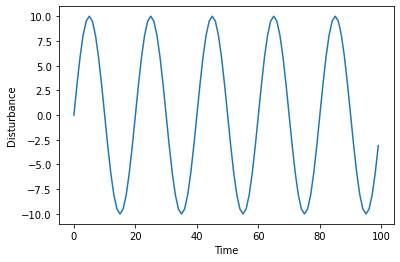

Apply open loop


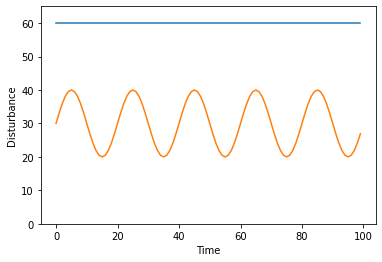

Apply closed loop


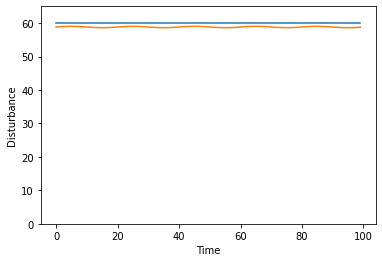

In [2]:
# Create vectors for time, reference speed (r), disturbance (d) and gain (K)
time_vec = np.array([x/10 for x in range(100)])
r = np.array([ 60 for _ in range(100)])
d = np.array([10 * math.sin(math.pi * x) for x in time_vec])
k = 50

print("Print rolling hills/disturbance") 
plt.plot(d)
plt.xlabel('Time')
plt.ylabel('Disturbance')
plt.show()

# 1. OPEN LOOP: cruise control hills

p_model = 2#[2 for _ in range(100)]
p_true = 1# for _ in range(100)]

u_ol = r / p_model
y_ol = p_true * u_ol + d


print("Apply open loop")
plt.plot(r)
plt.plot(y_ol)
plt.xlabel('Time')
plt.ylabel('Disturbance')
plt.ylim([0,65])
plt.show()

# 2. CLOSED LOOP: cruise control hills
y_cl = r * (p_true * k)/(1+p_true * k) + d /(1+p_true*k)

print("Apply closed loop")
plt.plot(r)
plt.plot(y_cl)
plt.xlabel('Time')
plt.ylabel('Disturbance')
plt.ylim([0,65])
plt.show()


### Cruise Control Example with Proportional-Integral (PI) control (video 30)
https://www.youtube.com/watch?v=vxTJMGqjGdg&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=30 <br>


Cuncertainty and disturbance is still going to be the focus. Previously, focus had been placed on *proportional* control i.e. the error betweent desired output, y, and input signal, r, multiplied by the term which was demonstrate in video 28 on cruise control as input $u_{CL} = K \epsilon = K(r-y)$. However, as shown in the closed example, the control $u_{cl} never converged to the reference speed r, the result output $y_{cl}$ was always slightly lower than reference/biased down. Inclusion of the integral term reduces steady state error to zero.

A second innovation presented is time delay of response to propagate through the system i.e. Y won't jump instantaneously in resposne to u it will take an amount of time.

#### Proportional + integral control
Note: the addition to 2 gains below $K_P$ and $K_I$, which are proportion and integral controllers accordingly. 

Previously, the model for the car was $y = 2u$. However, in this example the model of the car will be extended to include retarding dynamics of the car. 

$$\begin{align}
\dot{x} &= -x + u\\
y &= x \\
\end{align} $$


An additional parameter $\dot{z} = r - x$ is included to keep track of the integral term.
$$u = K_P(r-y) + K_i\int(r-y)dt$$
then the dynamical system equations become
$$ \dot{z} = r -x $$
$$ \dot{x} = -x + u = -x - K_px + K_Iz - K_pr$$
$$ u = K_P(r-x) + K_Iz$$


where the second equation is derived by substitution of u. With these substitutions, the system can be constructed as the following matrix form: 

$$ \frac{d}{dt} \begin{bmatrix} x \\ z \end{bmatrix}  = \begin{bmatrix} -1 -K_p & K_I \\ -1 & 0 \end{bmatrix}\begin{bmatrix} x \\ z \end{bmatrix} + \begin{bmatrix} -K_p & 1 \end{bmatrix} u $$
$$ y = \begin{bmatrix} 1 & 0 \end{bmatrix}\begin{bmatrix} x \\ z \end{bmatrix}$$

[0.         0.29779883 0.50691352 0.6537541  0.75686572 0.82927083
 0.88011378 0.91581575 0.94088572 0.95848989 0.97085155 0.97953192
 0.98562729 0.98990747 0.99291301 0.99502351 0.9965055  0.99754616
 0.99827691 0.99879004 0.99915037 0.99940339 0.99958106 0.99970582
 0.99979343 0.99985494 0.99989814 0.99992847 0.99994977 0.99996473
 0.99997523 0.99998261 0.99998779 0.99999143 0.99999398 0.99999577
 0.99999703 0.99999792 0.99999854 0.99999897 0.99999928 0.99999949
 0.99999964 0.99999975 0.99999982 0.99999988 0.99999991 0.99999994
 0.99999996 0.99999997 0.99999998 0.99999999 0.99999999 0.99999999
 0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       

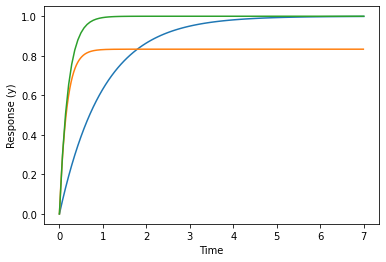

In [10]:
# represent the above system 

# no control (open loop) 
no_control_sys = signal.StateSpace(-1.0, 1.0, 1.0, 0.0)
t1, y1 = signal.step(no_control_sys)
plt.plot(t1,y1)
#plt.xlabel("Time")
#plt.ylabel("Response (y)")
#plt.show()


# proportional control; no integral gain
K = 5.0
prop_control = signal.StateSpace(-1 - K, K, 1.0, 0.0)
# include a predefined range of time incremenets, np.arange(0,7,0.01)
t1, y1 = signal.step(prop_control, X0=0 , T=np.arange(0,7,0.01))
plt.plot(t1,y1)
plt.xlabel("Time")
plt.ylabel("Response (y)")
# plt.show()


# proportional-integral control 
K = 5

a = np.array([[-1.0 - K, K], [-1.0,0.0]])
b = np.array([[K], [1.0]])
c = np.array([[1.0, 0.0]])
d = np.array([[0.0]])
prop_control = signal.StateSpace(a, b, c, d)
t1, y1 = signal.step(prop_control)
print(y1)
plt.plot(t1,y1 )
plt.xlabel("Time")
plt.ylabel("Response (y)")
plt.show()




### Sensitivity and complementary Sensitivity (video 31)
https://www.youtube.com/watch?v=hTu36q5yx20&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=31 <br>
Goals of feedback:
- stability (design)
- uncertainty (compensation)
- disturtbance (rejection)
- noise (attenuation)

Denoting the system in tranfer functions allows for easy analysis (sensitivity and complementary sensitivity).
- rejection of disturbances 
- attentuation of noise
- references. 

$$ L = PK $$
Sensitivity:
$$ S = (I + L)^{-1} $$ 
Complementary sensitivity
$$ T = (I + L)^{-1}L$$
then $S + T = I$

with the loop diagram with controller, K and system P, L becomes loop PK. 
Then, $Iy = P_d d + PK (r - y - n) $ which simplifies to: 

$$ (I + PK)y = PKr + P_dd -PK_n$$
$$ y = (I + PK)^{-1}K_r + (I + PK)^{-1}P_dd - (I + PK)^{-1}PK_n $$

![](cb_video_31.PNG)

### Sensitivity and Complementary Sensitivity (Part 2) (video 32)
https://www.youtube.com/watch?v=hEQdr1G5H2w&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=32 <br> 
Previously saw three parameters; 

Reference value, r:
$(I + PK)^{-1}K_r$ - usually affected by low frequency
Disturbance tracking: 
$(I + PK)^{-1}P_dd$ - usually affected by low frequency

Noise:
$(I + PK)^{-1}PK_n$ - usually affected by high frequency

### Loop shaping (video 33)
https://www.youtube.com/watch?v=sfNwLmgK5sE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=33 <br>

Have introduced *sensitivity* and *complementary sensitivity* functions which tell us how our system responds to reference, disturbances and noise inputs. The sensitivity and complementary sensitivity functions can be changed via the loop transfer function, $L = PK$. Bode plots are useful to identify the ideal L. The *sensitivity function*, $S = (I + L)^{-1}$ informs how robust the system is.

### Loop Shaping Example for Cruise Control (video 34) 
https://www.youtube.com/watch?v=fkYcCCujOjc&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=34 <br>

Starting with system equation $\dot{x} = -x + u $ an $y=x$, the system has the following transfer function $\frac{\bar{y}(s)}{\bar{u}(s)} = P(s) = \frac{1}{s+1}$. Loop is to be designed such that we have have high gain at low frequency to track references and disturbances, low gain at high frequency to reject noise. 

### Sensitivity and Robustness (video 35)
youtube.com/watch?v=7lzH-HnUFZg&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=35 <br> 

Have focused on what loop transfer functions should to look like for good uncertainty compensation, disturbance rejection and noise attentuation along with shape of Bode plot. Sensitivity, $ S = (I + L)^{-1} $,  gives direct measure of robustness; however this builds on a large body of work including *Nyquist stability critera*. 

A quick side track on Nyquist stability criteria; given L is in the complex plane, the closer L gets to (-1, 0i) the more unstable a system becomes. What is special about -1? Fundamental systems usually have the transfer function of form $y = \frac{PK}{1+PK} r$ where r is input, then since $L = PK$ if L = -1 the system becomes undefined and unstable. 

### Limitations on Robustness (video 36)
https://www.youtube.com/watch?v=ReAmUJMb1d8&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=36 <br>
Previous lecture reference the instability of the -1 value in complex plane (Nyquist instability equation). This instablility manifests as a peak in the sensitvity function; moreover, the $max_{w}|s| = 1/$ where m is the difference from -1 in complex plane.

Things that can cause system (loop transfer function) to blow up? 
1. Model uncertainty
2. Time delay (how fast the system can react)
3. Right half plane zeros of P (has to go in wrong direction before system goes in correct direction)

The above factors all impact how small the $\underset{w}{max}|s| = \frac{1}{m}$ can be. 

### Cautionary Tale About Inverting the Plant Dynamics (video 37)
https://www.youtube.com/watch?v=G9apWx4iaks&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=37 <br>
Previous lectures focused on robustness and stability, sometimes you can invert plant transfer function to derive loop transfer function. However, inverting plant, P, to get desired attributes of controller, K.

Example:
Given plant, P, with system $\frac{s+10}{s-5}$, then a good controller, K could be $K= \frac{s-5}{s+10}$ such that$KP = \frac{s-5}{s+10} \frac{s+10}{s-5}$. However, issues arise if $P_{true} = \frac{s+10}{s-5 + \epsilon}$ then $P_{true}K = \frac{s-5}{s-5+\epsilon}$ where the numerator yields a zero at 5 (unobservable state) and denominator yields a pole at $s = 5 -\epsilon$. The system will be both **unstable** and **unobservable**. 

Moral of story is if your system has a right hand plane pole do not invert it; even if your plant, P is off by an $\epsilon$ then the system becomes both **unstable** and **unobservable**.

### Control systems with non-minimum phase dynamics (video 38)
https://www.youtube.com/watch?v=7GjnvuKeWI8&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=38 <br>
A very brief overview on non-minimum phase dynamics for control systems; there's two considerations for non-minimum phase:

1. Right half plan zero; when the transfer function, G(s), has a zero in the right-hand plane i.e. consider system with transfer function $\frac{s-1}{s+5}$. This system has a zero at s = 1. This puts fundamental limits on the controllability of the system.
2. Goes in wrong direction first given some into pulse. An aeroplane gaining altitude is an example which needs to shift its centre of mass down first before increasing altitude. This wrong direction is analogous to a 'time-delay' constraint as getting to an optimal output there is an additional trajcectory.

### Control theory and COVID-19 (video 39)
https://www.youtube.com/watch?v=BTLZu-1IMcE&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=39 <br>
Flattening the COVID-19 infection curve can be framed as a control problem. Covid-19 exhibits many properties of an interesting control system problems, i.e. time delayed responses.
To oversimplify, when modelling a disease (i.e. COVID-19) one outcome we want to model is the rate of infections overtime. If rate is too large, then the healthcare system will not cope.

Controllers:
- Masks
- Vaccines
- Lockdowns 
- Knowledge of system
- Every person is part of the controller

Disease system: 
- Viral properties
- Mutations.

The COVID-19 system feedback is defined by the measurments (number of cases); set point is number of infections. Feedback (measurement of numebr of cases) allows us to overcome system uncertainty. Further time delay of being able to measure rates of infections decreases robust performance.

Models considered:
- Agent based models
- Network dynamics models
- High dimension non-linear models
- SIR models

Further zoom in on:
- Sensing/measurement issues
- Time delays 


**Control theory is really applied optimisation where you are trying to shape your system output by designing an effective controller/control strategy.**

### Control theory and COVID-19: Sensors (video 40)
https://www.youtube.com/watch?v=ooNvhfepD_c&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=40 <br> 
In this lecture, focus on dependency on accurate, fast measurements and are at the heart of robustness and effective controllers. 

Contents of lecture:
- Why we need sensors
- Why fast; time delays
- What sensing strategies are out there?

Sensors (tests):
- Test for ymptoms
- Test of anti-bodies
- Test for RNA
- Time delays (to determine state of person)
- Statistical biases (ensure not just testing a biasly selected group)

##### Time delays are the trickiest component of this system
Will cause you to do wrong control at wrong time. Once way around this is to have have a predictive model on what the future state of the system will be then derive control optimised relative to that system.

*"If you want to do a good job, you want to extensively be measuring your system"*


### Control theory and COVID-19: Summary
https://www.youtube.com/watch?v=zsJ0bbEvx5c&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=41 <br>
Key takeways of control applications to COVID-19. 
Challenges:
- Uncertainty in models
- Noise measurments
- No defined ways to measure effect of controller
- Time varying parameters
- Limits on controllabilty - can't shut down essential services

Effective feedback control requires sensors AND TIME DELAYS must be overcome!

**Control theory is a way to balance imperfect measurements and imperfect models to still make quality control decisions**

### Control theory and COVID-19: Models

Focus speciifically on disease system and how we can use this system to make decisions. All the models (of infection propagation) are wrong but they are can be leveraged within a control framework to make drive robust outcomes. 

Uncertainties the COVID-19 control system is carrying; 
- disease system - number of beds available, number of healthcare staff, how people interact
- uncertainty of controller - how decisions effect diseases
- uncerainty of measurements - how to gain accurate sensors of system
- time varying parameters - people get fatigued by too much quarrantine
- time-delay


**MOdel predictive control** is only way to deal with ALL these uncertainties at once; 
Will cover following models: 
1. Agent based 
2. Compartmental (differential equations)
3. Parameter fit (statistical)


2. Compartmental (differential) 
SIR model; susceptatble, infected, and recovered defined by differential equations: 
$$\frac{dS}{dt} = -\frac{\beta}{N}SI$$
$$\frac{dI}{dt} = \frac{\beta}{N}SI - \gamma I$$
$$\frac{dR}{dt} = \gamma I$$ 

Parameters will differe for different groups (by population, age, gender, etc). However, important to be able to disentangle different groups from entire population. 

We really care about changing the rate of change of infected $\frac{dI}{dt} $ which is driven by $R_0 = \frac{\beta}{N}$ where $\beta$ is parameter we can control by inteventions. 

1. Agent based models
Simulate different types of agents i.e. eseential worker agent vs non-essential worker agent. 


2. Statistical projections 
Get forecasts for projections of future infections, I using statistical models and then estimate the parameters of the distributions. 


### Control theory and COVID-19; Control design (video 43)
https://www.youtube.com/watch?v=BkpORajO3Ak&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=43 <br> 
Understanding COVID-19 from a control perspective. 

Control design is an applied optimisation; however, defining cost function for COVID-19 is a difficult problem, can't just optimise for deaths, still need to operate supply chains. 
Control is extremely important to understand how the system (number of infections) will respond to different actions. 

Model predictive control (MPC) extremely valuable from a causal understanding perspective especially when your models are extremely uncertain. One of the most used control strategies in industry. MPC is an extremely important tool in balancing imperfect measurements, system models and controllers to make agile, robust and high performance decisions. 

**Robustness** - we don't just want to optimise but also have a robust system. If you're system is not robust the system will face instability. 



### Machine learning meets Control Theory (video 44)

Reinforcement learning = control + ml.RL is bracnh of ML to learn how to interact with complex environment from experience/interaction with enviroment. RL is inspired by natural applications, and the word reinforce comes from rewarding enforcing control strategies by rewards. There are two pieces:
1. HOw to interact with environment
2. How optimise a policy given data. 

All control problems are really optimisation problem; ML solves this optimisation with data. 

At heart start with:
1. Agent
2. Environment

Agent has knowledge of state and actions with the final reward (potentially being at the end) the episode.  GOal is to learn what actions contributed to the rewards. If a reward is given at every time step then the problem becomes a supervised learning method; however, as the reward are rare and time delayed the problem becomes a semi-supervised learning problem. 

Goal is to design a **policy** to maximise the total reward; policy is defined by $\pi(s,a) = Pr(A=a|S=s)$. Not this is **probabilistic**. This assists in exploring the environment. 

ONe problem at heart of RL is how to back propagate rewards, this is the **credit assignment problem**. Hindsight replay is a way to capture actions which may not have achieved the defined goal but has achieved a different goal. These goals can be stored and used later when solving for **defined goal**. 

HOw good a certain state is, is the expectation of how good the sum of all future rewards and is termed the **value function**; **value function** is given as $V_{\pi}(s) = E(\sum \gamma ^ t r_t| s_0 = s)$. Overtime an RL framework hopes to improve its knowledge/accuaracy of the **value function**. 

##### Markov Decision Process
A state space of {reward, state, action}. 


Optimisations: 
- differential programming
- monte carlo 
- tmeporarl difference learning
- Bellman equation
- exploitation vs exploration
- policy iteration 

Its very possible to learn physics of a system. The pilko learner is one very efficient way for learning dynamics starting with Newtons equations. 


### Deep reinforcement learning (video 45)

Opitmisinga  probabilistic policy to maximise future rewards given a value function of value of each state. Policy can be defined by neural network such function $Pr(A=a|S=s)$ is a neural network, name of game to update the policy as new experience becomes available, which is the optimisation problem. Neurons that fire together wire together i.e. when reward is achieved a neural network will have have those weights strengthened to favour more of those actions. 

**Quality function**; q-learning represents a method to map both state and action at the same time $Q(s,a)$. *Brian Douglas has really good video on RL for control. ADD THIS TO TRELLO BOARD!!* 

RL is really good when rules are constrained and algorithms have all the time in the world to train. Humans can assist learning by **reward shaping** to assist with learning. Elevator scheduling uses RL to optimise optimal scheduling problem. 

RL framework to interact with environment in an optimal way however still a long way to go.

### Model predictive control (video 46) 
A powerul optimisation strategy for feedback contro; whereby if you have a system model you run forecasts and then run your control on the forecast. Goal is to identify the optimal u given the prediction. $K(x_k) = u_{k+1}(x_k)$, this function can be interpretted as $x_k$ is the optimisation over the *time horizon* and then $u_(k+1)(\cdot)$ selects optimal action for time = t + 1. 

Why is this so powerful? 
- Can impose constraints/bounds on what control loop can do (space of action). 

Every time step a new full optimisation (over the time horizon) is run. However, this requires MPC to be run *online*. This means our control strategy K changes through time. The dynamics of the system can be learnt by through data driven methods such as RL.

*Time horizon:* time optimisation is being run over. 

### Deep reinforcement Learning for Fluid Flow and Dynamics and Control (video 47) 
Biological systems are exetremely good at interacting with complex environments. Biologically inspired approaches to reinforcment learning have great promise for success. In deep RL replacing policy with complex non-linear neural network. 

Challenges for RL applications to fluid dynamics: 
1. high dimensional environments
2. limited measurements of states/simulations

Applications; 
1. Simulating an agent in a fluid i.e fish in stream
2. Simulate/control the fluid itself i.e. air flow over a truck, aeroplane wing. 


Again, RL = machine learning $\cup$ control theory.

Rubber hits road from Stanford application of RL to helicopter acrobaticcs where policy learnt to fly helicopter.  


### Reinforcement Learing: Overview of Methods (video 48)
https://www.youtube.com/watch?v=i7q8bISGwMQ&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=49 <br>
Again, Steve's overview of RL is that it's machine learning to learn good control policies. 
RL problem: agent interacts with environment via a set of *actions* and at each step observe a *state* and get a *reward* which can be delayed. Actions are taken via a policy $ \pi(s,a)$ . 

Value function: 
$$ V_\pi(s) = E (\sum_t \gamma^tr_t|s_0=s) $$ with the goal of learning an optimal policy

First big dichotomy is **model based** vs **model free** RL:
**Model based (linear) Markov decision process:**
If you have a model of your environment then you can use either *Policy Iteration* of *Value Iteration*.

**Model based (non-linear) Non-linear dynamics:**
Optimal control and HJB

**Model FREE: gradient free:**
Dynamics of environment are not known and try to simultaneously learn dynamics of environment while learning optimal policy. 
In gradient based methods, there's both *on-policy* and *off-policy*. On policy means that we always take actions from our current optimal policy whereas *off-policy* RL doesn't always follow current optimal policy i.e. has curiousity to try alternative actions. Q-learning implicitly learns model of the environment.

**Model FREE: Gradient based RL**
Where a poicy has continuous gradients which can be leveraged to improve policy optimisation process.

![](video_48.PNG)

### Model based RL: Policy Iteration, Value Iteration and Dynamic Programming (video)
https://www.youtube.com/watch?v=sJIFUTITfBc&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=50 <br>

Assume that the system evolves under an Markov Decision Process, MDP, which generalises a Markov Process by including a reward.
The model of enviroment is: 
$$R(s',s,a) = Pr(r_{k+1} | s_{k+1} = s', s_k = s, a_k = a)$$
$$P(s',s,a) = Pr(s_{k+1} = s'| s_k = s, a_k = a)$$

Note: chess solution is not brute forceable however, dynamic programming allows us to break down solution into sum of future rewards.

Value function is given by:
$$V_\pi(s) = E(\sum_k \gamma^k r_k | s_0 = s) $$ 
The value function can be broken into a recursive function (which is the definition of the Bellman equation): 
$$ V(s) = max_pi E(r_0 + \gamma V(s'))$$

Note: you can always extract a policy from a value function.
Bellman equation says you can break a problem down into sub-problems, solve them independently and then add them back together to solve the overall solution. 

**Value iteration:**
One step process
With above value function becomes:
$$ V(s) = max_a \sum_{s'} P(s'|s,a)(R(s',s,a) + \gamma V(s'))$$ 

Where $V(s')$ is the future rewards we are trying to optimise over. For **value iteration** the above equation is iterated until convergence is reached then an optimal policy is *read off*. 


**Policy iteration**
A two step process where: 
1. Value function improved
2. Policy improved
Iteration until convergence, policy iteration usually converges faster. 

$$V_\pi(s) $$

Quality function (Q-function): 



### Model free, gradient free method
Q(s,a) is the **quality function of state/action pair** which quantifies the benefit of taking action= a from state = s.
Q(s,a) = E$(R(s',s,a) + \gamma V(s'))$ = $ \sum_{s'}P(s'|s,a)(R(s',s,a) + \gamma V(s'))$ then the value function becomes $V(s) = max_a Q(s,a)$ and policy becomes $\pi(s,a) = argmax_a Q(s,a)$. However, we don't have the model $P(s'|s,a)$ and reward $R(s',s,a)$.


##### Monte Carlo learning
Simplist approach, requires entire episode to be run before a reward can be used. Monte Carlo methods assume that all actions are equal in contribution to the reward of an episode such that the following quality function is produced: 
$$ Q^{new}(s_k, a_k) = Q^{old} (s_k, a_k) + \frac{1}{n} (R_\sigma - Q^{old}(s_k, a_k) ) \quad  \forall k \in [1, \dots, n]$$

However, one upside is that is has no bias.

##### Temporal Difference Learning (TD[0])
Temporal difference learning has the following value function where the value function follows: 
$$V^{new}(s_k) = V^{old}(s_k) + \alpha (r_k + \gamma V^{old}(s_{k+1}) - V^{old}(s_k))$$

**Q-learning is temporal difference learning on the Q-function**

##### Q-learning; off policy learning of the q-function
$$Q^{new}(s_k, a_k) = Q^{old}(s_k,a_k) + \alpha (r_k + \gamma max_a Q^{old}(s_{k+1, a}) - Q^{old}(s_k, a_k))$$

##### SARSA; on policy learning of the q-function

$$Q^{new}(s_k, a_k) = Q^{old}(s_k,a_k) + \alpha (r_k + \gamma  Q^{old}(s_{k+1, a_{K+1}}) - Q^{old}(s_k, a_k))$$
In SARSA, at each step you must take the optimal policy step. 

Summing up, both Q-learning and SARSA can be thought of as data driven approaches to the dynamic programming approach when a model of environment isn't available. The subtle difference between the two is in *k+1* update step; whereas SARSA updates the Q function following the same policy at $k$ (giving an on policy update) Q Learning takes *greedy* action in the *k+1* step hence said to be off policy. 

![](Qlearning_vs_sarsa.PNG)

### Nonlinear Control: Hamilton Jacobi Bellman (HJB) and Dynamic Programming (video 50)
https://www.youtube.com/watch?v=-hO-AnFYm6M&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=52 <br>
Optimal non-linear control where goal is to derive some controller u(t) to follow x(t) to minimize a cost function J. 
The function $J(x(t), u(t), t_0, t_f)$ = terminal cost + trajectory cost which can be written as: 
 $J(x(t), u(t), t_0, t_f) = Q(x(t_f), t_f) + \int^{t_f}_{t_0} L(u(\tau), x(\tau)) d \tau$.
 
 A *value function* can be derived also coined the *cost to go*. 
 $$V(x(t_0), t_0, t_f) = min_{u_t}J(x(t), u(t), t_0, t_f)$$
 
 <font color='red'>ADD HAMILTON-JACOBI-BELLMAN DERIVATION</font>
 
 Hamilton-Jacobi-Belmman equation; says that the value function of going from 0 to n is the same as adding 0 to k + k to n. 
 
 In a discrete non-linear system, solving for the value function by taking min u(t) then selecting argmin u will yield the optimal policy. 

# Contents:
- Videos 2 - 4: First 3 videos focus purely on dynamical systems; control inputs of $U$ matrix is not yet introduced. 
- Videos 5 - 10: Introduce notion of controlability $u$, proving a system is controllable and the magnitude of controllability a system has. 
- Videos 11 - 13: Building controllers, and examples of controller in cart pole
- Videos 14 - 23: Observability, full state estimation and examples in using Kalman filter (LQE).
- Videos 24 - : Introduction to robust control, dealing with uncertainty and disturbances